## Predicitng sales and number of customers of Rossmann stores with Artificial Neural Network in Keras (Regression)

### Information about the dataset

- Number of inputs: **1 017 209**
- Number of features: **19**
- Dataset: https://www.kaggle.com/c/rossmann-store-sales
- Data fields description: can be found here https://www.kaggle.com/c/rossmann-store-sales

### Importing main libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import warnings; warnings.simplefilter('ignore')

**Loading of the dataset. Two dataset from the website were merged sepately, a merged version is presented**

In [2]:
df_un = pd.read_csv("exported.csv")

**Some data preprocessing**

In [3]:
#convert to datetime
df_un['Date'] = pd.to_datetime(df_un['Date'])

#create a month column from date column
df_un['month'] = df_un['Date'].dt.month

#create seasonal column
conditions = [
    (df_un['month'] == 1) | (df_un['month'] == 2) | (df_un['month'] == 12),
    (df_un['month'] == 3) | (df_un['month'] == 4) | (df_un['month'] == 5),
    (df_un['month'] == 6) | (df_un['month'] == 7) | (df_un['month'] == 8)  
]

choices = ['Winter', 'Spring', 'Summer']
df_un['Season'] = np.select(conditions, choices, default='Autumn')

**Usage of LabelEncoder to transform categorical variables**

In [4]:
#le = preprocessing.LabelEncoder()
#df_un['Season'] = le.fit_transform(df_un['Season'])
#df_un['StoreType'] = le.fit_transform(df_un['StoreType'])
#df_un['StateHoliday'] = le.fit_transform(df_un['StateHoliday'])
#df_un['Assortment'] = le.fit_transform(df_un['Assortment'])

**Removing values with competion distance = na and days when shops were closed**

In [5]:
df_un = df_un[df_un['CompetitionDistance'].notnull()]
df_un = df_un[df_un['Open']!=0]

**A value to predict**

In [6]:
y = df_un.iloc[:, 3]

**Creating a separate dataframe with categorical variables to apply get_dummies**
#only some columns from a dataset will be used - DayOfWeek,	Promo,	StateHoliday,	SchoolHoliday,	StoreType,	Assortment,	month,	Season


In [7]:
#indexes of columns with and without categorical variables
col_list = [1,6,7,8,9,10,19,20]
no_cat_var = [11]

df_un_cat = df_un.iloc[:, col_list]
df_un_non_cat = df_un.iloc[:, no_cat_var]

**Convert some variables to "category" so get_dummies encodes it**

In [8]:
#conversion so get_dummies works
df_un_cat['Promo']= df_un_cat['Promo'].astype('category')
df_un_cat['SchoolHoliday'] = df_un_cat['SchoolHoliday'].astype('category')
df_un_cat['month']= df_un_cat['month'].astype('category')
df_un_cat['DayOfWeek']= df_un_cat['DayOfWeek'].astype('category')

**Applying get_dummies** <br/>
Dropping first dummy column is important to avoid collinearity, so drop_first is set to True

In [9]:
df = pd.get_dummies(df_un_cat, drop_first=True)

In [10]:
pd.options.display.max_columns = None

In [11]:
df.head()

,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Promo_1,StateHoliday_a,StateHoliday_b,StateHoliday_c,SchoolHoliday_1,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Season_Spring,Season_Summer,Season_Winter
1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


**Adding continuos variables to encoded categorical**

In [42]:
X = pd.merge(df, df_un_non_cat, left_index=True, right_index=True)

**Final dataset**

In [43]:
X.head()

,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Promo_1,StateHoliday_a,StateHoliday_b,StateHoliday_c,SchoolHoliday_1,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Season_Spring,Season_Summer,Season_Winter,CompetitionDistance
1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,4610.0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4610.0
3,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4610.0
4,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4610.0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4610.0


### Creation of a Neural Network

**Train/test split**

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_m, y, test_size = 0.2)

**Feature Scaling**

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
"""
To apply it to a dataset:

import numpy as np

X_train_scaled = scaler.transform(X_train)
new_data = np.array([-1.,  1., 0.])    
new_data_scaled = scaler.transform(new_data)
>>>new_data_scaled
array([[-2.44...,  1.22..., -0.26...]])"""

'\nTo apply it to a dataset:\n\nimport numpy as np\n\nX_train_scaled = scaler.transform(X_train)\nnew_data = np.array([-1.,  1., 0.])    \nnew_data_scaled = scaler.transform(new_data)\n>>>new_data_scaled\narray([[-2.44...,  1.22..., -0.26...]])'

**Importing the Keras libraries and packages**

In [40]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

### Predicting sales of Rossmann shops per day

**How the model will look like:** <br/>
5 layers, each has 96 neurons, small dropout to prevent overfitting, relu as an activator, mean squared error as loss function, adam as an optimizer, 15 epochs.

In [44]:
# Initialising the ANN
model = Sequential()    
model.add(Dense(units = 96, kernel_initializer = 'uniform', activation = 'relu', input_dim = 31))
model.add(Dropout(p = 0.1))
model.add(Dense(units = 96, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(p = 0.1))
model.add(Dense(units = 96, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(p = 0.1))
model.add(Dense(units = 96, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(p = 0.1))
model.add(Dense(units = 96, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(p = 0.1))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape'])
history = model.fit(X_train, y_train, batch_size = 10000, epochs = 15)

Epoch 1/15
673764/673764 [==============================] - 17s 25us/step - loss: 52881351.8786 - mean_squared_error: 52881351.8786 - mean_absolute_error: 6542.2389 - mean_absolute_percentage_error: 27359145.17490s - loss: 58070283.6800 - mean_squared_error: 58070283.6800 - mean_absolute
Epoch 2/15
673764/673764 [==============================] - 16s 23us/step - loss: 9248372.8743 - mean_squared_error: 9248372.8743 - mean_absolute_error: 2214.0424 - mean_absolute_percentage_error: 373030808.2047
Epoch 3/15
673764/673764 [==============================] - 16s 23us/step - loss: 7841499.2344 - mean_squared_error: 7841499.2344 - mean_absolute_error: 2048.2934 - mean_absolute_percentage_error: 382541773.6798
Epoch 4/15
673764/673764 [==============================] - 16s 24us/step - loss: 7724952.1392 - mean_squared_error: 7724952.1392 - mean_absolute_error: 2033.4242 - mean_absolute_percentage_error: 381200468.3719
Epoch 5/15
673764/673764 [==============================] - 15s 23us/step -

**MSE plot**

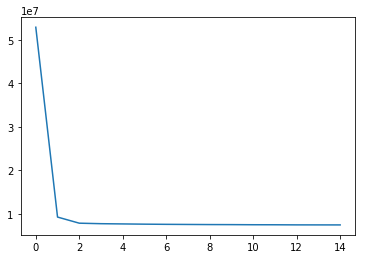

In [45]:
plt.plot(history.history['mean_squared_error'])

**MAE plot**

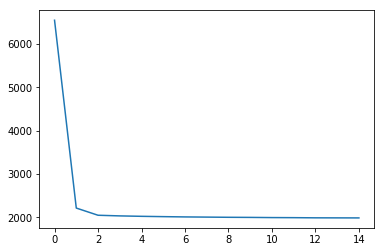

In [62]:
plt.plot(history.history['mean_absolute_error'])

**R-squared of a model**

In [46]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) 

0.27531140368150253

**MSE of a model**

In [47]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

7073767.011295403

**MAE of a model**

In [48]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

1911.9825658878501

**A table that compares real and predicted values**

In [60]:
final_preds = []
for pred in y_pred:
    final_preds.append(pred[0])

y_test_pr = []
for pred in y_test:
    y_test_pr.append(pred)

d = {'y_test': y_test_pr, 'final_preds': final_preds}
pd.DataFrame(data=d).round(0)[:10]

,y_test,final_preds
0,3600,5930.0
1,3264,5648.0
2,11497,8473.0
3,3518,5158.0
4,1379,5307.0
5,4838,4941.0
6,8337,5033.0
7,5490,5418.0
8,10420,9858.0
9,6139,6781.0


### Predicting sales of Rossmann shops per day

In [67]:
y = df_un.iloc[:, 4]

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_m, y, test_size = 0.2)

##**Feature Scaling**

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [69]:
# Initialising the ANN
model = Sequential()    
model.add(Dense(units = 96, kernel_initializer = 'uniform', activation = 'relu', input_dim = 31))
model.add(Dropout(p = 0.1))
model.add(Dense(units = 96, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(p = 0.1))
model.add(Dense(units = 96, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(p = 0.1))
model.add(Dense(units = 96, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(p = 0.1))
model.add(Dense(units = 96, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(p = 0.1))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape'])
history = model.fit(X_train, y_train, batch_size = 10000, epochs = 15)

Epoch 1/15
673764/673764 [==============================] - 13s 20us/step - loss: 558032.8175 - mean_squared_error: 558032.8175 - mean_absolute_error: 615.5145 - mean_absolute_percentage_error: 11384505.4453
Epoch 2/15
673764/673764 [==============================] - 13s 19us/step - loss: 122927.3301 - mean_squared_error: 122927.3301 - mean_absolute_error: 241.0994 - mean_absolute_percentage_error: 42779576.3843
Epoch 3/15
673764/673764 [==============================] - 13s 19us/step - loss: 115429.0723 - mean_squared_error: 115429.0723 - mean_absolute_error: 234.8803 - mean_absolute_percentage_error: 42174909.6388
Epoch 4/15
673764/673764 [==============================] - 13s 20us/step - loss: 114120.2412 - mean_squared_error: 114120.2412 - mean_absolute_error: 233.4680 - mean_absolute_percentage_error: 42796632.3242
Epoch 5/15
673764/673764 [==============================] - 13s 19us/step - loss: 113390.0300 - mean_squared_error: 113390.0300 - mean_absolute_error: 232.7679 - mean_a

**R-squared of a model**

In [71]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) 

0.36251668787505475

**MSE of a model**

In [72]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

102731.89357727279

**MAE of a model**

In [73]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

218.19085490895657

**A table that compares real and predicted values**

In [74]:
final_preds = []
for pred in y_pred:
    final_preds.append(pred[0])

y_test_pr = []
for pred in y_test:
    y_test_pr.append(pred)

d = {'y_test': y_test_pr, 'final_preds': final_preds}
pd.DataFrame(data=d).round(0)[:10]

,y_test,final_preds
0,927,776.0
1,547,766.0
2,479,581.0
3,747,624.0
4,488,676.0
5,617,626.0
6,788,668.0
7,1251,823.0
8,486,682.0
9,1454,988.0


### Summary

Model, that predicts number of customers, does a better job than a model that predicts sales. Moreover, customers model predict with an error 200 customers on average, while sales model predicts with an error around 1900 euros.